# Clustering Indonesia’s Processed Food Import Dependencies 

### Objective

To analyze Indonesia’s import trends of processed food and agro-products from 2013 to 2023, identify top-performing and declining products using CAGR analysis, and apply K-Means clustering to segment products based on growth potential and import value — providing insights for strategic procurement or trade policy decisions.


### Dataset

* Source: International Trade Centre (ITC Trade Map)

* Reporter: Indonesia

* Partner: World

* Product Group: Processed food and agro-products (e.g. wheat flour, milk, sauces, etc)

* Period: 2013–2023

* Value Unit: USD Thousand (i.e., all import values are in thousands of US dollars)  

* Format: Excel

* Link: https://www.trademap.org/Index.aspx?nvpm=1%7c%7c%7c%7c%7c%7c%7c%7c%7c%7c%7c%7c%7c%7c%7c%7c%7c


### Data Inspection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Indonesia Import (Processed and Agro Product Group).xlsx")

In [3]:
df.head()

,Code,Product label,Short Label,Import 2013,Import 2014,Import 2015,Import 2016,Import 2017,Import 2018,Import 2019,Import 2020,Import 2021,Import 2022,Import 2023,CAGR
0,170114,"Raw cane sugar, in solid form, not containing ...","Raw cane sugar,",1570005,1260738,1226500,1994294,2017962,1754948,1317596,1813552,2229890,2825118,2700730,0.055743
1,230400,"Oilcake and other solid residues, whether or n...",Oilcake and other,1926982,2194935,1814026,1573862,1641738,2045261,1658749,1938225,2679429,3193789,3018467,0.045902
2,100630,"Semi-milled or wholly milled rice, whether or ...",Semi-milled or wholly,164474,240176,201343,402684,235,870050,4154,19373,41638,54529,1602174,0.255629
3,210690,"Food preparations, n.e.s.","Food preparations, n.e.s.",512320,466326,444489,415024,418540,501418,492866,495038,629522,783219,658485,0.025417
4,40210,"Milk and cream in solid forms, of a fat conten...",Milk and cream,605987,649230,386209,326722,343746,322766,441747,541583,595576,860467,596002,-0.001660


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Code           316 non-null    int64  
 1   Product label  316 non-null    object 
 2   Short Label    316 non-null    object 
 3   Import 2013    316 non-null    int64  
 4   Import 2014    316 non-null    int64  
 5   Import 2015    316 non-null    int64  
 6   Import 2016    316 non-null    int64  
 7   Import 2017    316 non-null    int64  
 8   Import 2018    316 non-null    int64  
 9   Import 2019    316 non-null    int64  
 10  Import 2020    316 non-null    int64  
 11  Import 2021    316 non-null    int64  
 12  Import 2022    316 non-null    int64  
 13  Import 2023    316 non-null    int64  
 14  CAGR           316 non-null    float64
dtypes: float64(1), int64(12), object(2)
memory usage: 37.2+ KB


In [5]:
df.describe()

,Code,Import 2013,Import 2014,Import 2015,Import 2016,Import 2017,Import 2018,Import 2019,Import 2020,Import 2021,Import 2022,Import 2023,CAGR
count,316.000000,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,316.000000
mean,160400.506329,2.877411e+04,2.830691e+04,2.418992e+04,2.696291e+04,2.702377e+04,3.200909e+04,2.730181e+04,2.920523e+04,3.637868e+04,4.420249e+04,4.551209e+04,-0.077862
std,76953.216639,1.517393e+05,1.543593e+05,1.320921e+05,1.511015e+05,1.535484e+05,1.654529e+05,1.294068e+05,1.578354e+05,2.049391e+05,2.515112e+05,2.517706e+05,0.392414
min,21020.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000
25%,110490.000000,1.700000e+02,9.475000e+01,9.500000e+01,1.047500e+02,1.075000e+02,9.500000e+01,1.002500e+02,7.775000e+01,8.475000e+01,1.070000e+02,7.975000e+01,-0.093335
50%,170113.500000,1.109000e+03,1.066500e+03,1.008000e+03,1.003000e+03,1.069000e+03,1.121500e+03,1.297000e+03,9.950000e+02,1.249000e+03,1.572500e+03,1.536500e+03,0.028109
75%,200943.000000,8.420000e+03,8.402750e+03,7.200500e+03,9.071000e+03,9.575750e+03,1.123425e+04,1.127800e+04,9.919000e+03,1.160350e+04,1.499725e+04,1.366950e+04,0.115262
max,382319.000000,1.926982e+06,2.194935e+06,1.814026e+06,1.994294e+06,2.017962e+06,2.045261e+06,1.658749e+06,1.938225e+06,2.679429e+06,3.193789e+06,3.018467e+06,1.230716


### Data Cleaning

In [6]:
# Check data dimensions
print("Shape of dataset:", df.shape)

Shape of dataset: (316, 15)


In [7]:
# Check for missing values
df.isnull().sum()

Code             0
Product label    0
Short Label      0
Import 2013      0
Import 2014      0
Import 2015      0
Import 2016      0
Import 2017      0
Import 2018      0
Import 2019      0
Import 2020      0
Import 2021      0
Import 2022      0
Import 2023      0
CAGR             0
dtype: int64

In [8]:
# Check data types
print("\nData Types:\n", df.dtypes)


Data Types:
 Code               int64
Product label     object
Short Label       object
Import 2013        int64
Import 2014        int64
Import 2015        int64
Import 2016        int64
Import 2017        int64
Import 2018        int64
Import 2019        int64
Import 2020        int64
Import 2021        int64
Import 2022        int64
Import 2023        int64
CAGR             float64
dtype: object


In [9]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Number of duplicate rows: 0


In [10]:
# Standardize column names (strip, lower, underscore)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [11]:
# Check converted column names
print("\nCleaned Column Names:\n", df.columns.tolist())


Cleaned Column Names:
 ['code', 'product_label', 'short_label', 'import_2013', 'import_2014', 'import_2015', 'import_2016', 'import_2017', 'import_2018', 'import_2019', 'import_2020', 'import_2021', 'import_2022', 'import_2023', 'cagr']


### Exploratory Data Analysis (EDA)

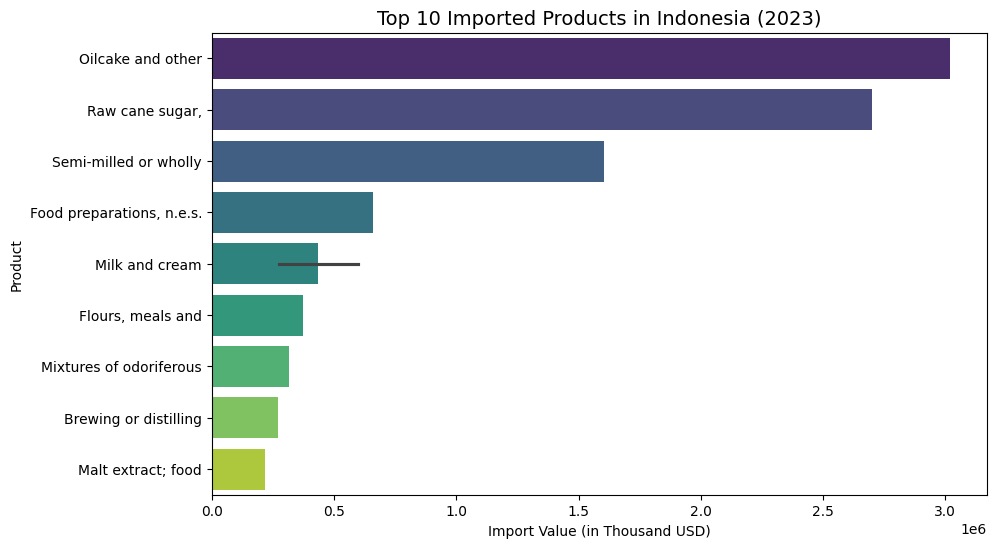

In [12]:
# Sort by 2023 import value
top_products = df.sort_values(by='import_2023', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='import_2023', y='short_label', data=top_products, palette='viridis')
plt.title('Top 10 Imported Products in Indonesia (2023)', fontsize=14)
plt.xlabel('Import Value (in Thousand USD)')
plt.ylabel('Product')
plt.show()

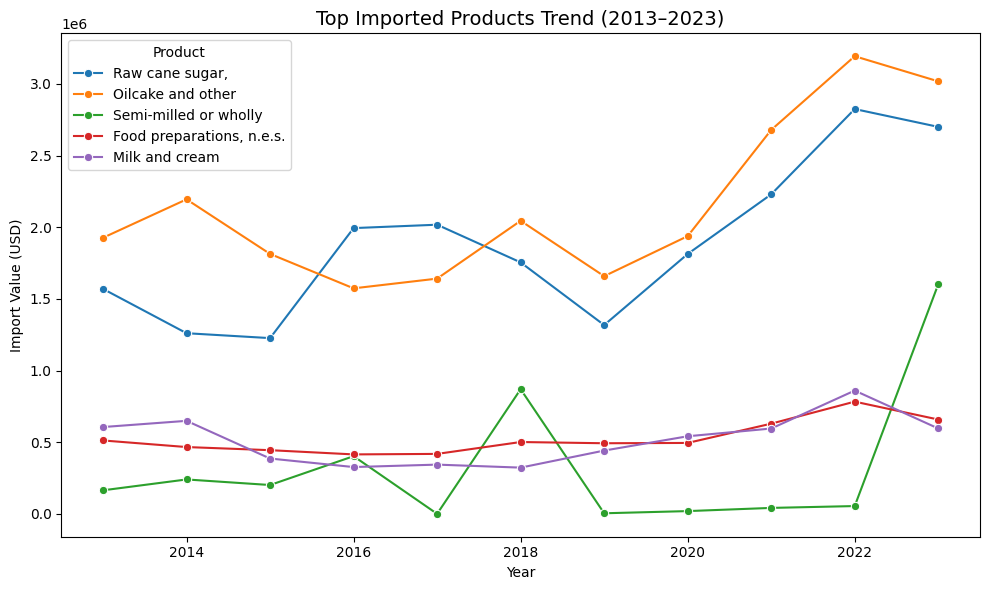

In [13]:
# Select top 5 products based on 2023 import value
top_2023 = df.sort_values(by='import_2023', ascending=False).head(5)

# Get the product codes
top_codes = top_2023['code'].tolist()

# Filter the main DataFrame for those products
df_trend = df[df['code'].isin(top_codes)]

# Reshape the dataset from wide to long format
trend_cols = [f"import_{y}" for y in range(2013, 2024)]
df_long = df_trend.melt(
    id_vars=['code', 'short_label'],  # if 'short_label' doesn't exist, replace with the correct column
    value_vars=trend_cols,
    var_name='year',
    value_name='import_value'
)

# Extract year as integer
df_long['year'] = df_long['year'].str.extract('(\d+)').astype(int)

# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='year', y='import_value', hue='short_label', marker='o')
plt.title('Top Imported Products Trend (2013–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Import Value (USD)')
plt.legend(title='Product')
plt.tight_layout()
plt.show()

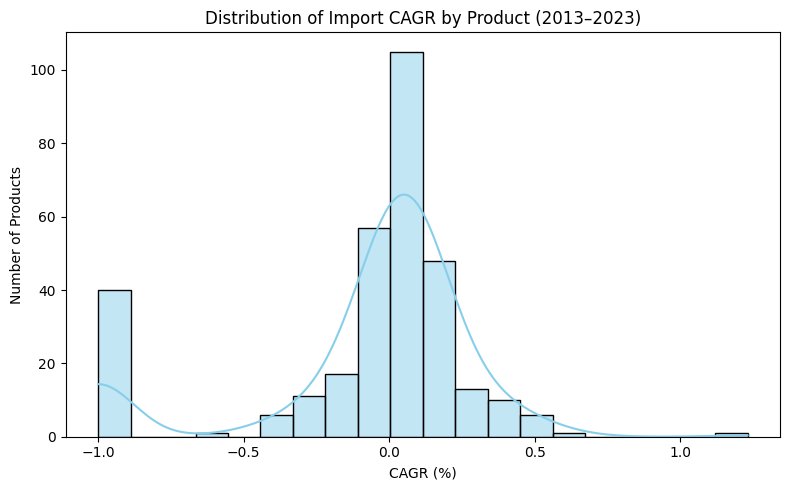

In [14]:
# Plot distribusi CAGR
plt.figure(figsize=(8, 5))
sns.histplot(df['cagr'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Import CAGR by Product (2013–2023)')
plt.xlabel('CAGR (%)')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

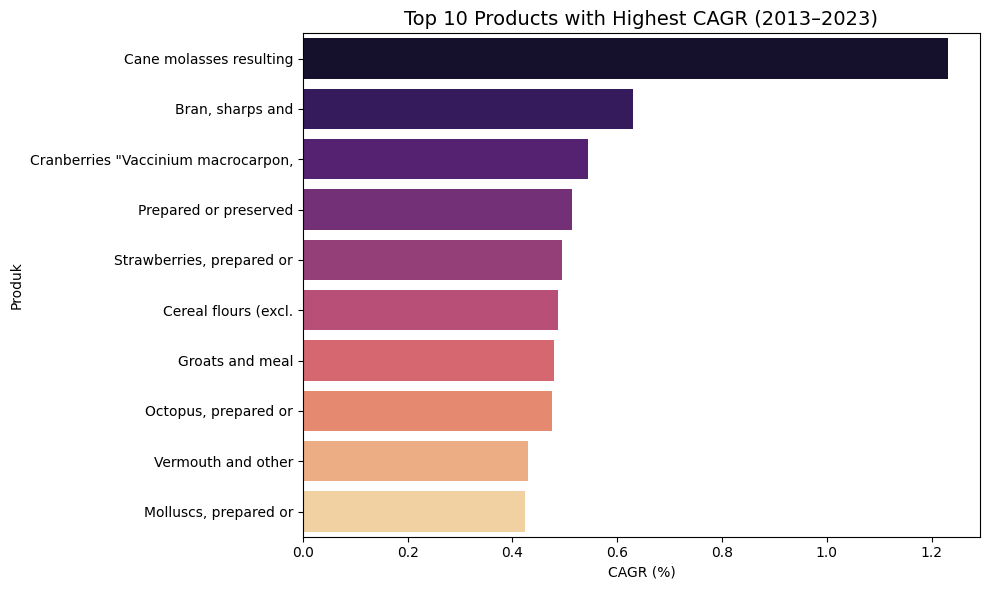

In [15]:
# Products with the highest growth
top_growth = df.sort_values(by='cagr', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_growth, x='cagr', y='short_label', palette='magma')
plt.title('Top 10 Products with Highest CAGR (2013–2023)', fontsize=14)
plt.xlabel('CAGR (%)')
plt.ylabel('Produk')
plt.tight_layout()
plt.show()

### Machine Learning

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [17]:
# Select variables for clustering
features = df[['cagr', 'import_2023']].copy()

In [18]:
# Scale variables due to different scales between 'cagr' and 'import_2023'
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

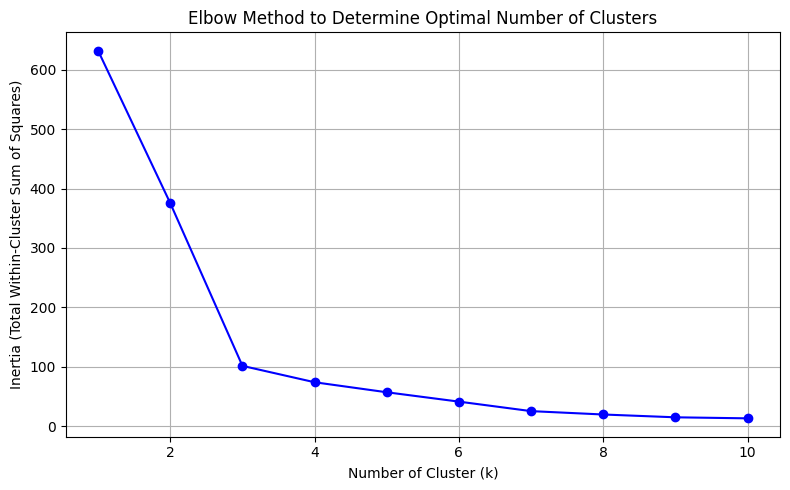

In [19]:
#Elbow Method to find optimal K
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Cluster (k)')
plt.ylabel('Inertia (Total Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# Apply KMeans
kmeans_final = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans_final.fit_predict(scaled_features)

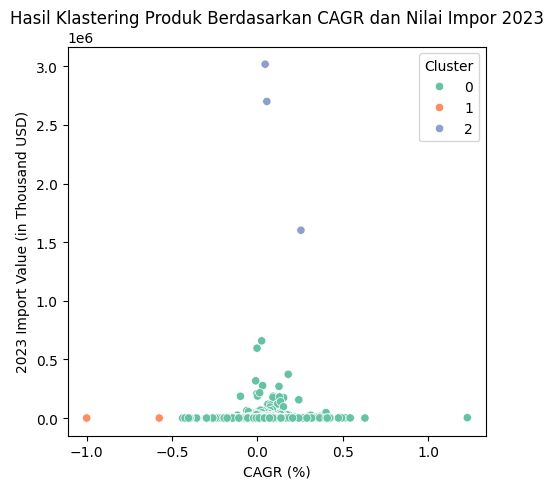

In [21]:
# Clustering Result of Products Based on CAGR and 2023 Import Value

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='cagr', y='import_2023', hue='cluster', palette='Set2')
plt.title('Hasil Klastering Produk Berdasarkan CAGR dan Nilai Impor 2023')
plt.xlabel('CAGR (%)')
plt.ylabel('2023 Import Value (in Thousand USD)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [22]:
# Displays the contents of each cluster in table form

selected_columns = ['code', 'product_label', 'short_label', 'cagr', 'import_2023', 'cluster']

# Filter per cluster
cluster_0 = df[df['cluster'] == 0][selected_columns].sort_values(by='import_2023', ascending=False)
cluster_1 = df[df['cluster'] == 1][selected_columns].sort_values(by='cagr', ascending=True)
cluster_2 = df[df['cluster'] == 2][selected_columns].sort_values(by='import_2023', ascending=False)

# Show
print(" Cluster 0 – General Products, Low-Medium Volume, Low Growth")
display(cluster_0)

print("\n Cluster 1 – Products with Sharply Negative CAGR")
display(cluster_1)

print("\n Cluster 2 – Strategic Products, High Volume (High Value Imports)")
display(cluster_2)


 Cluster 0 – General Products, Low-Medium Volume, Low Growth


,code,product_label,short_label,cagr,import_2023,cluster
3,210690,"Food preparations, n.e.s.","Food preparations, n.e.s.",0.025417,658485,0
4,40210,"Milk and cream in solid forms, of a fat conten...",Milk and cream,-0.001660,596002,0
6,230110,"Flours, meals and pellets, of meat or offal, u...","Flours, meals and",0.180985,373290,0
5,330290,Mixtures of odoriferous substances and mixture...,Mixtures of odoriferous,-0.009402,317394,0
9,40221,"Milk and cream in solid forms, of a fat conten...",Milk and cream,0.031180,276702,0
...,...,...,...,...,...,...
272,160290,"Prepared or preserved meat, offal, blood or in...",Prepared or preserved,0.071773,2,0
312,200850,"Apricots, prepared or preserved, whether or no...","Apricots, prepared or",-0.297167,1,0
299,81290,"Fruit and nuts, provisionally preserved, e.g. ...","Fruit and nuts,",-0.403040,1,0
252,71231,"Dried mushrooms of the genus ""Agaricus"", whole...",Dried mushrooms of,-0.355606,1,0



 Cluster 1 – Products with Sharply Negative CAGR


,code,product_label,short_label,cagr,import_2023,cluster
231,30571,"Shark fins, smoked, dried, salted or in brine","Shark fins, smoked,",-1.00000,0,1
234,30539,"Fish fillets, dried, salted or in brine, but n...","Fish fillets, dried,",-1.00000,0,1
242,30749,"Cuttle fish and squid, smoked, dried, salted o...",Cuttle fish and,-1.00000,0,1
249,30569,"Fish, salted or in brine only (excl. fillets, ...","Fish, salted or",-1.00000,0,1
262,160563,"Jellyfish, prepared or preserved (excl. smoked)","Jellyfish, prepared or",-1.00000,0,1
255,30520,"Fish livers, roes and milt, dried, smoked, sal...","Fish livers, roes",-1.00000,0,1
271,150210,"Tallow of bovine animals, sheep or goats (excl...",Tallow of bovine,-1.00000,0,1
274,40819,"Egg yolks, fresh, cooked by steaming or boilin...","Egg yolks, fresh,",-1.00000,0,1
281,30544,"Smoked tilapia ""Oreochromis spp."", catfish ""Pa...","Smoked tilapia ""Oreochromis",-1.00000,0,1
277,160569,"Aquatic invertebrates, prepared or preserved (...","Aquatic invertebrates, prepared",-1.00000,0,1



 Cluster 2 – Strategic Products, High Volume (High Value Imports)


,code,product_label,short_label,cagr,import_2023,cluster
1,230400,"Oilcake and other solid residues, whether or n...",Oilcake and other,0.045902,3018467,2
0,170114,"Raw cane sugar, in solid form, not containing ...","Raw cane sugar,",0.055743,2700730,2
2,100630,"Semi-milled or wholly milled rice, whether or ...",Semi-milled or wholly,0.255629,1602174,2


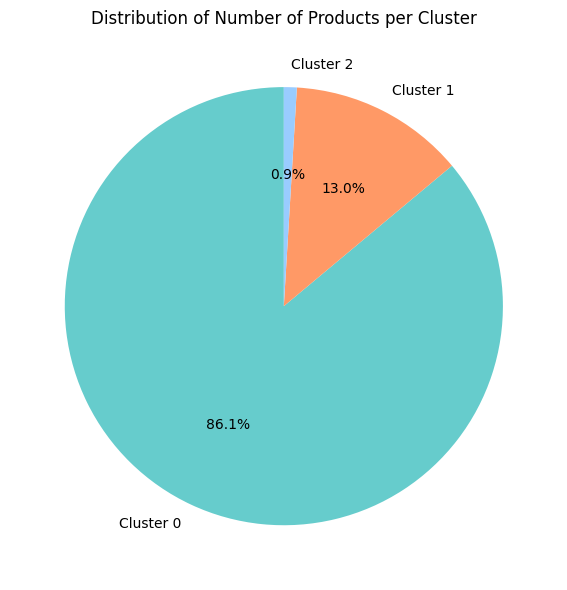

In [23]:
# Count number of products per cluster
cluster_counts = df['cluster'].value_counts().sort_index()

# Pie chart visualization
cluster_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6),
                    labels=[f'Cluster {i}' for i in cluster_counts.index], colors=['#6cc', '#f96', '#9cf'])
plt.title('Distribution of Number of Products per Cluster')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [24]:
df.groupby('cluster')[['cagr', 'import_2023']].describe()

cagr                                                              \
         count      mean       std       min       25%       50%       75%   
cluster                                                                      
0        272.0  0.057401  0.183500 -0.437618 -0.021733  0.048989  0.132817   
1         41.0 -0.989629  0.066408 -1.000000 -1.000000 -1.000000 -1.000000   
2          3.0  0.119091  0.118347  0.045902  0.050822  0.055743  0.155686   

                  import_2023                                          \
              max       count          mean            std        min   
cluster                                                                 
0        1.230716       272.0  2.595751e+04   73564.524367        1.0   
1       -0.574780        41.0  1.707317e-01       1.093216        0.0   
2        0.255629         3.0  2.440457e+06  743154.083188  1602174.0   

                                                      
                25%        50%        75%        max  
cluster                                               
0            309.25     2524.0    16422.0   658485.0  
1              0.00        0.0        0.0        7.0  
2        2151452.00  2700730.0  2859598.5  3018467.0

##  Key Insights from Clustering Results

Based on the clustering results using **CAGR** (2013–2023) and **Import Value in 2023**, the products were grouped into 3 distinct clusters. The table below summarizes the characteristics of each cluster:




---

###  Cluster 0 – General / Low-Mid Value Products
- Largest group (272 products).
- Moderate growth rate (+5.7% CAGR).
- Import values are relatively small.

###  Cluster 1 – Sunset Products (Obsolete)
- Very steep negative CAGR (around −99%).
- Average import value close to **zero**.
- Likely phased out due to regulatory shifts, local substitutions, or reduced demand.

###  Cluster 2 – Strategic & High-Value Imports
- Smallest group (3 products), but extremely **high import value** (avg. ~$2.4M).
- High and positive CAGR (+11.9%).
- Critical to monitor for cost efficiency, supply stability, or import substitution strategies.

---

##  Business Implications

- **Cluster 2** should be prioritized for strategic sourcing, import cost optimization, or potential local production initiatives.
- **Cluster 0** offers opportunities for rationalization through bundling, warehouse optimization, or supplier management.
- **Cluster 1** includes products with declining relevance — these may be discontinued or ignored in future import plans.